# Imports and data load

In [2]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import random
import geopy.distance
import pandas as pd


In [27]:
path = ""
puglia_prov = gpd.read_file(path+"/puglia_prov.geojson")
puglia_mun = gpd.read_file(path+"/puglia_mun.geojson")
uliveti = gpd.read_file(path+"/uliveti.geojson")

In [28]:
uliveti1 = uliveti.copy()
uliveti1 = uliveti1.to_crs(epsg=3395)
uliveti1['geometry'] = uliveti1.centroid

In [90]:
area = puglia_prov[puglia_prov['DEN_PROV'] == "Lecce"]
#area big if in Lecce, Brindisi or Taranto
area_big = puglia_prov[puglia_prov['DEN_PROV'].isin(["Lecce","Brindisi","Taranto"])]
#merge
area = area.to_crs(epsg=3395)    # convert to World Mercator CRS
area_big = area_big.to_crs(epsg=3395)
area_shape = area.iloc[0].geometry
#merge together the polygon of the three provinces in area big
area_shape_big = area_big.unary_union 
uliveti1 = uliveti1[uliveti1.within(area_shape)]

In [30]:
uliveti_latlong = uliveti1.to_crs(epsg=4326)

In [47]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:.2f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# Creation of distance adjacency matrix

In [48]:
#create an adjacency matrix with the distance between the centroids of the olive trees
n = len(uliveti_latlong)
adj_matrix = np.zeros((n,n))

for i in range(n):
    printProgressBar(i,n)
    for j in range(i+1,n):
        dist = geopy.distance.distance(uliveti_latlong.iloc[i].geometry.coords[0],uliveti_latlong.iloc[j].geometry.coords[0]).m
        adj_matrix[i,j] = dist
        adj_matrix[j,i] = dist

pd.save_csv(path+"distance_matrix.csv", adj_matrix, delimiter=",")

# Load of the matrix

In [5]:
#load  
adj_matrix = pd.read_csv(path+"distance_matrix.csv", delimiter=",", index_col=0)

In [6]:
#index and columns to str

adj_matrix.columns = adj_matrix.columns.astype(str)
adj_matrix.index = adj_matrix.index.astype(str)

#remove last 2 digits from columns
adj_matrix.columns = adj_matrix.columns.str[:-2]
adj_matrix.index = adj_matrix.index.str[:-2]
#remove last
adj_matrix 


,1120,1121,1124,1125,1126,1127,1128,1129,1130,1131,...,57678,58068,58292,58376,58377,58378,58379,58380,58381,58444
0,,,,,,,,,,,,,,,,,,,,,
1120,0.000000,3336.422311,6736.144008,15935.534528,12399.495597,9984.555466,13522.402974,6843.561106,14393.959476,15311.931941,...,67764.767001,70802.120779,63247.961096,66806.844013,69084.956844,66673.670661,64606.505752,64234.245710,67617.545313,68733.355055
1121,3336.422311,0.000000,6758.300799,13044.779070,15707.916182,13270.839054,16834.570634,10073.608959,17708.170285,18614.463508,...,66793.120749,70224.260505,62811.187181,65736.390546,67829.696944,65806.999029,64028.040170,64058.367295,66783.868428,67670.496173
1124,6736.144008,6758.300799,0.000000,12616.143817,14675.296008,12282.082660,15747.883827,9285.529247,16579.130302,17249.668606,...,61050.067189,64073.873424,56539.614931,60113.502810,62449.863830,59944.654308,57877.523124,57599.848611,60885.503322,62037.482526
1125,15935.534528,13044.779070,12616.143817,0.000000,27031.737356,24564.167357,28140.113994,21363.584586,28996.265225,29733.377050,...,57587.711184,62242.028586,55445.510691,56239.444640,57750.737292,56949.539657,56152.426567,57583.788061,58016.899311,58170.041314
1126,12399.495597,15707.916182,14675.296008,27031.737356,0.000000,2489.558479,1132.448036,5753.341697,2008.754871,2916.647605,...,70959.792974,72503.363197,64591.270641,70378.212774,73283.873563,69508.870275,66436.353579,64595.813360,70314.105277,72241.334546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58378,66673.670661,65806.999029,59944.654308,56949.539657,69508.870275,68266.051632,70013.146111,66878.256205,70400.810702,70311.886580,...,2419.316092,7415.449730,9076.875737,4229.017866,8565.745959,0.000000,6087.379457,13825.243146,1178.297031,4571.201780
58379,64606.505752,64028.040170,57877.523124,56152.426567,66436.353579,65367.096229,66861.403217,64225.748910,67188.540448,67024.128620,...,8503.369519,6197.774929,3023.841162,10127.327733,14604.406041,6087.379457,0.000000,7802.378561,5898.697781,10655.663575
58380,64234.245710,64058.367295,57599.848611,57583.788061,64595.813360,63796.609496,64897.331851,63029.287408,65129.636756,64852.492963,...,16214.434113,10347.429919,5116.607083,17927.020243,22382.599795,13825.243146,7802.378561,0.000000,13448.112935,18354.424658


## Define adj matrices for different thresholds in meters 

### nb. By saving as sparse matrices, we loose info regarding the identity of the nodes (need to map them later)

In [7]:
thresholds = [1000,900,800,700,600,500,400,300,200,100]
import scipy.sparse as sparse
for t in thresholds:
    adj_matrix[adj_matrix>t] = 0
    print("Threshold: ", t)
    #save as sparse matrix (npz)
    sparse_matrix = sparse.csr_matrix(adj_matrix)
    sparse.save_npz("/Users/matteoscianna/Desktop/Other_Self/RingVax/data/tree_net/distance_matrix_"+str(t)+".npz", sparse_matrix)




Threshold:  1000
Threshold:  900
Threshold:  800
Threshold:  700
Threshold:  600
Threshold:  500
Threshold:  400
Threshold:  300
Threshold:  200
Threshold:  100


## For each threshold, plot the corresponding degree distribution


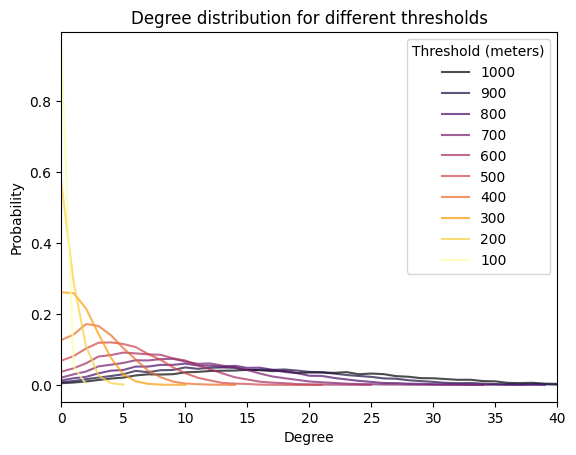

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = plt.cm.inferno(np.linspace(0,1,10))
thresholds = [1000,900,800,700,600,500,400,300,200,100]

for t in thresholds:
    sparse_matrix = sparse.load_npz("/Users/matteoscianna/Desktop/Other_Self/RingVax/data/tree_net/distance_matrix_"+str(t)+".npz")

#create graph
    G = nx.from_scipy_sparse_array(sparse_matrix)
#get degree distribution
    degrees = [val for (node, val) in G.degree()]
#probability distribution
    degree_prob = np.zeros(max(degrees)+1)
    for d in degrees:
        degree_prob[d] += 1
    degree_prob = degree_prob/len(degrees)
#plot
    plt.plot(degree_prob, color=colors[thresholds.index(t)], label="Threshold: "+str(t),alpha=0.7)
    plt.xlabel("Degree")
    plt.ylabel("Probability")

plt.legend(thresholds, title="Threshold (meters)")
plt.xlim(0,40)
#title
plt.title("Degree distribution for different thresholds")
plt.show()




# Example 1: Plot a random point with its neighbors

Text(0.5, 1.0, 'Random olive tree with neighbors \n Threshold = 1000 meters')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:2038: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 2] += tx
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:2039: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[1, 2] += ty


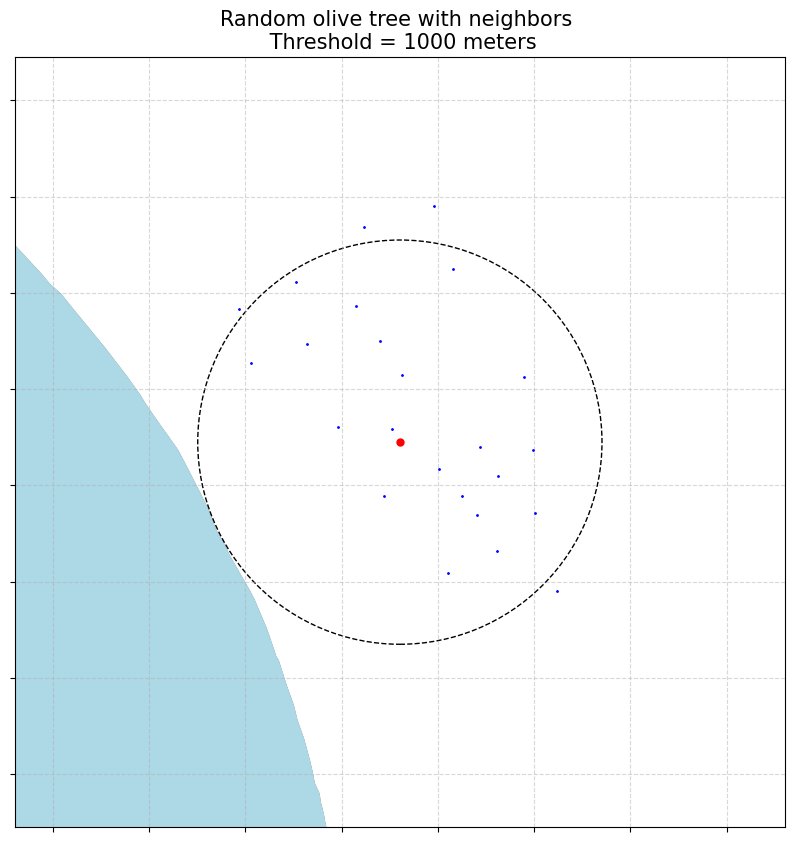

In [87]:
random.seed(1)

#set a threshold
threshold = 1000

mat = sparse.load_npz("/Users/matteoscianna/Desktop/Other_Self/RingVax/data/tree_net/distance_matrix_"+str(threshold)+".npz")
#I want the id of the nodes to be the same as the index of the dataframe
nodes = uliveti_latlong.index.astype(str)
G = nx.from_scipy_sparse_array(mat)
G = nx.relabel_nodes(G, dict(zip(range(len(nodes)), nodes)))



random_point = random.choice(list(G.nodes))
#get neighbors
neighbors = list(G.neighbors(random_point))

point1 = uliveti_latlong[uliveti_latlong["id"] == random_point]

id1 = point1["id"]

point1_toplot = point1.to_crs(epsg=3395)






fig, ax = plt.subplots(figsize=(10,10))   
#plot only the area of Lecce and a bit of Brindisi and Taranto (neighbouring provinces)
area_big.plot(ax=ax, facecolor="none", edgecolor='grey')
n_xtics = len(ax.get_xticks())
n_ytics = len(ax.get_yticks())
min_lat = min(area_big.to_crs(epsg=4326).bounds["miny"])
max_lat = max(area_big.to_crs(epsg=4326).bounds["maxy"])
min_lon = min(area_big.to_crs(epsg=4326).bounds["minx"])
max_lon = max(area_big.to_crs(epsg=4326).bounds["maxx"])
lat = np.linspace(min_lat,max_lat,n_xtics)
lon = np.linspace(min_lon,max_lon,n_ytics)
ax.set_xticklabels([],fontsize = 13)
ax.set_yticklabels([],fontsize = 13)
#grid
ax.grid(linestyle = "--",alpha = 0.5)
#display ticks and labels
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sea = gpd.GeoSeries(
    [
        box(*box(*area_shape_big.bounds).buffer(0.1).bounds).difference(
            area_shape_big
        )
    ]
)


"""#get currend x and y limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#set new limits: coordinatesof

plt.xlim((xlim[0]+10000,xlim[1]-10000))
plt.ylim((ylim[0]+7300,ylim[1]-50000))"""

#I want x and y limits to be correspondent to the coordinates of the point + 10000
ax.set_xlim(((point1_toplot["geometry"].x-2*threshold).item(),(point1_toplot["geometry"].x+2*threshold).item()))
ax.set_ylim(((point1_toplot["geometry"].y-2*threshold).item(),(point1_toplot["geometry"].y+2*threshold).item()))


sea.plot(ax=ax, facecolor="lightblue", edgecolor='lightblue')

#ADD A CIRCLE OF RADIUS 500 METERS
circle = plt.Circle((point1_toplot["geometry"].x, point1_toplot["geometry"].y), threshold+50, color='black', fill=False,linestyle="--")
ax.add_artist(circle)


ax.plot(point1_toplot["geometry"].x, point1_toplot["geometry"].y,markersize=5,color = "red", marker="o")
for n in neighbors:
    point = uliveti_latlong[uliveti_latlong["id"] == n]
    point_toplot = uliveti1[uliveti1["id"] == n]
    ax.plot(point_toplot["geometry"].x, point_toplot["geometry"].y, marker= "o",markersize=1,color = "blue")


#add title
plt.title("Random olive tree with neighbors \n Threshold = "+str(threshold)+" meters", fontsize=15)


# Example 2: Plot 2 random points with their distance

/var/folders/n2/rkbqmjkd5zq285vcm3hz8tnr0000gn/T/ipykernel_98311/2538904453.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(round(i,1)) for i in lon],fontsize = 13)
/var/folders/n2/rkbqmjkd5zq285vcm3hz8tnr0000gn/T/ipykernel_98311/2538904453.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(round(i,1)) for i in lat],fontsize = 13)
/var/folders/n2/rkbqmjkd5zq285vcm3hz8tnr0000gn/T/ipykernel_98311/2538904453.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(point1_toplot["geometry"].x, point1_toplot["geometry"].y, 'ro', markersize=5,color = "red")
/var/folders/n2/rkbqmjkd5zq285vcm3hz8tnr0000gn/T/ipykernel_98311/2538904453.py:53: UserWarning: color 

Text(0.5, 1.0, 'Two random olive trees \n Distance: 56860.89 meters')

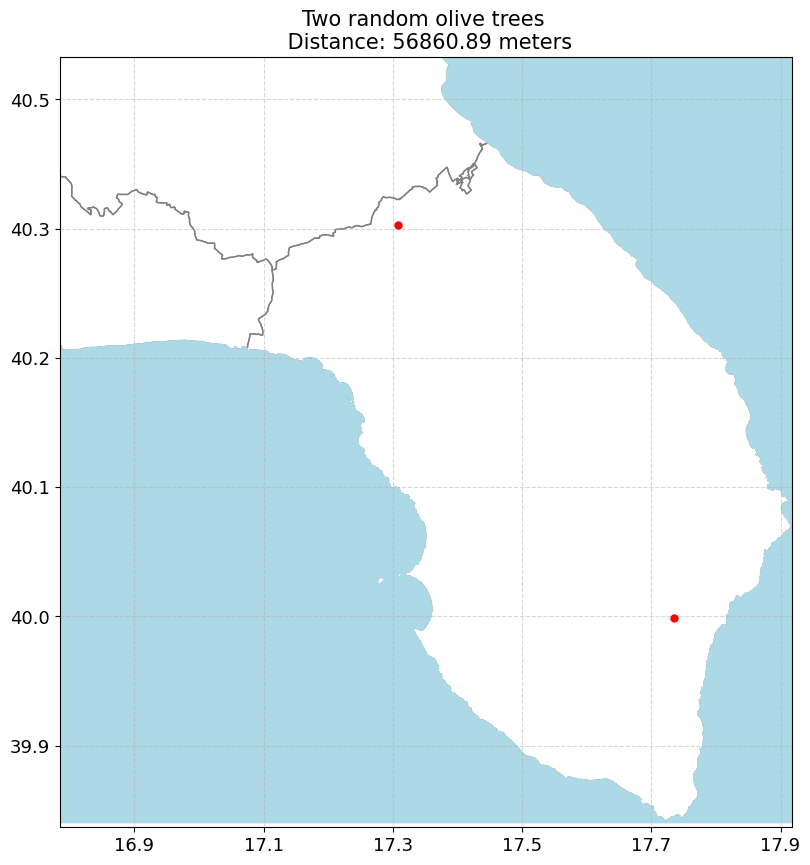

In [86]:
point1 = uliveti_latlong.iloc[random.randint(0, len(uliveti_latlong))]
point2 = uliveti_latlong.iloc[random.randint(0, len(uliveti_latlong))]

#get id of the two points
id1 = point1["id"]
id2 = point2["id"]

point1_toplot = uliveti1[uliveti1["id"] == id1]
point2_toplot = uliveti1[uliveti1["id"] == id2]

distance = geopy.distance.distance((point1["geometry"].y, point1["geometry"].x), (point2["geometry"].y, point2["geometry"].x)).m




fig, ax = plt.subplots(figsize=(10,10))   
#plot only the area of Lecce and a bit of Brindisi and Taranto (neighbouring provinces)
area_big.plot(ax=ax, facecolor="none", edgecolor='grey')
n_xtics = len(ax.get_xticks())
n_ytics = len(ax.get_yticks())
min_lat = min(area_big.to_crs(epsg=4326).bounds["miny"])
max_lat = max(area_big.to_crs(epsg=4326).bounds["maxy"])
min_lon = min(area_big.to_crs(epsg=4326).bounds["minx"])
max_lon = max(area_big.to_crs(epsg=4326).bounds["maxx"])
lat = np.linspace(min_lat,max_lat,n_xtics)
lon = np.linspace(min_lon,max_lon,n_ytics)
ax.set_xticklabels([str(round(i,1)) for i in lon],fontsize = 13)
ax.set_yticklabels([str(round(i,1)) for i in lat],fontsize = 13)
#grid
ax.grid(linestyle = "--",alpha = 0.5)
#display ticks and labels
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sea = gpd.GeoSeries(
    [
        box(*box(*area_shape_big.bounds).buffer(0.1).bounds).difference(
            area_shape_big
        )
    ]
)


#get currend x and y limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

plt.xlim((xlim[0]+100000,xlim[1]-10000))
plt.ylim((ylim[0]+7300,ylim[1]-50000))

sea.plot(ax=ax, facecolor="lightblue", edgecolor='lightblue')

ax.plot(point1_toplot["geometry"].x, point1_toplot["geometry"].y, 'ro', markersize=5,color = "red")
ax.plot(point2_toplot["geometry"].x, point2_toplot["geometry"].y, 'ro', markersize=5,color = "red")

#title
plt.title("Two random olive trees \n Distance: "+str(round(distance,2))+" meters", fontsize=15)


